# Can we predict height from using acoustics?

In [15]:
#import libraries 
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,time,f1,f2,f3,f4,b1,b2,b3,b4,...,ntime,sf1,sf2,sf3,sf4,sf0,vowel,speaker,true height,gender
0,1,25.171171,976.90,1632.86,2636.22,4059.48,156.450106,222.210000,292.333892,294.941931,...,0.000000,974.765004,1636.908060,2624.342151,4079.103343,226.412835,a,11,69,F
1,2,28.144144,975.39,1631.37,2626.86,4065.88,156.447433,226.743485,303.320624,259.105758,...,0.014493,975.846417,1637.739555,2624.477781,4079.485941,226.371576,a,11,69,F
2,3,31.117117,976.52,1631.43,2619.63,4071.57,158.010292,231.238515,311.059737,237.521053,...,0.028986,979.024270,1640.188245,2624.878045,4080.604028,226.248368,a,11,69,F
3,4,34.090090,978.71,1633.49,2614.18,4077.81,159.782326,240.878601,309.315260,213.708116,...,0.043478,984.104022,1644.119611,2625.523514,4082.370601,226.044907,a,11,69,F
4,5,37.063063,984.71,1641.31,2612.90,4084.18,165.184203,251.804602,305.311886,200.772406,...,0.057971,990.776480,1649.318844,2626.383238,4084.647581,225.763988,a,11,69,F


In [3]:
#check for missing data
missing_data = df.isnull()
missing_data.head(5)

,Unnamed: 0,time,f1,f2,f3,f4,b1,b2,b3,b4,...,ntime,sf1,sf2,sf3,sf4,sf0,vowel,speaker,true height,gender
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Unnamed: 0
False    4079
Name: Unnamed: 0, dtype: int64

time
False    4079
Name: time, dtype: int64

f1
False    4079
Name: f1, dtype: int64

f2
False    4079
Name: f2, dtype: int64

f3
False    4079
Name: f3, dtype: int64

f4
False    4079
Name: f4, dtype: int64

b1
False    4079
Name: b1, dtype: int64

b2
False    4079
Name: b2, dtype: int64

b3
False    4079
Name: b3, dtype: int64

b4
False    4079
Name: b4, dtype: int64

f0
False    4079
Name: f0, dtype: int64

acf
False    4079
Name: acf, dtype: int64

pwr
False    4079
Name: pwr, dtype: int64

err
False    4079
Name: err, dtype: int64

cutoff
False    4079
Name: cutoff, dtype: int64

file
False    4079
Name: file, dtype: int64

token
False    4079
Name: token, dtype: int64

ntime
False    4079
Name: ntime, dtype: int64

sf1
False    4079
Name: sf1, dtype: int64

sf2
False    4079
Name: sf2, dtype: int64

sf3
False    4079
Name: sf3, dtype: int64

sf4
False    4079
Name: sf4, dtype: int64

sf0
False    4079
Name: sf0, dtype: int6

In [5]:
#check types in data frame
df.dtypes

Unnamed: 0       int64
time           float64
f1             float64
f2             float64
f3             float64
f4             float64
b1             float64
b2             float64
b3             float64
b4             float64
f0             float64
acf            float64
pwr            float64
err            float64
cutoff         float64
file            object
token            int64
ntime          float64
sf1            float64
sf2            float64
sf3            float64
sf4            float64
sf0            float64
vowel           object
speaker          int64
true height      int64
gender          object
dtype: object

In [6]:
#replace categorical variable with numeric values
df['gender'].replace(to_replace=['M','F'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,time,f1,f2,f3,f4,b1,b2,b3,b4,...,ntime,sf1,sf2,sf3,sf4,sf0,vowel,speaker,true height,gender
0,1,25.171171,976.90,1632.86,2636.22,4059.48,156.450106,222.210000,292.333892,294.941931,...,0.000000,974.765004,1636.908060,2624.342151,4079.103343,226.412835,a,11,69,1
1,2,28.144144,975.39,1631.37,2626.86,4065.88,156.447433,226.743485,303.320624,259.105758,...,0.014493,975.846417,1637.739555,2624.477781,4079.485941,226.371576,a,11,69,1
2,3,31.117117,976.52,1631.43,2619.63,4071.57,158.010292,231.238515,311.059737,237.521053,...,0.028986,979.024270,1640.188245,2624.878045,4080.604028,226.248368,a,11,69,1
3,4,34.090090,978.71,1633.49,2614.18,4077.81,159.782326,240.878601,309.315260,213.708116,...,0.043478,984.104022,1644.119611,2625.523514,4082.370601,226.044907,a,11,69,1
4,5,37.063063,984.71,1641.31,2612.90,4084.18,165.184203,251.804602,305.311886,200.772406,...,0.057971,990.776480,1649.318844,2626.383238,4084.647581,225.763988,a,11,69,1


In [37]:
#remove whitespaces from column names
df.columns = df.columns.str.replace(' ', '')

In [38]:
#check if whitespaces were removed 
print(df.columns.tolist())

['Unnamed:0', 'time', 'f1', 'f2', 'f3', 'f4', 'b1', 'b2', 'b3', 'b4', 'f0', 'acf', 'pwr', 'err', 'cutoff', 'file', 'token', 'ntime', 'sf1', 'sf2', 'sf3', 'sf4', 'sf0', 'vowel', 'speaker', 'trueheight', 'gender']


In [57]:
#get means for all vowels per speaker in new dataframe
df_means = df.groupby('speaker', as_index=False)['f0', 'f1', 'f2', 'f3', 'f4', 'trueheight', 'gender'].mean()
df_means.head()

,speaker,f0,f1,f2,f3,f4,trueheight,gender
0,11,208.807427,821.233688,1644.396809,2740.434752,4039.600851,69,1
1,12,186.236335,828.964286,1787.921270,3137.985397,4288.081746,58,1
2,13,230.258117,756.256333,1749.312833,2973.965167,4231.598167,68,1
3,14,181.737544,878.618957,1731.535092,2842.795276,4268.894479,65,1
4,17,205.390580,875.218562,1655.819315,3051.036849,4169.153973,62,1


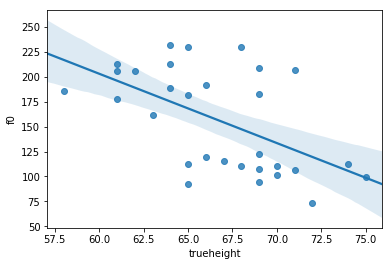

In [45]:
#model f0 regression plot
f0 = sns.regplot('trueheight','f0', data=df_means)
plt.show()

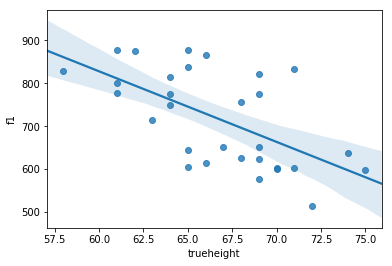

In [48]:
#model f1 regression plot
f0 = sns.regplot('trueheight','f1', data=df_means)
plt.show()

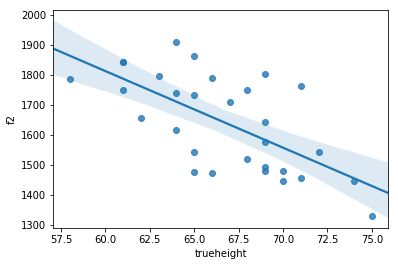

In [49]:
#model f2 regression plot
f0 = sns.regplot('trueheight','f2', data=df_means)
plt.show()

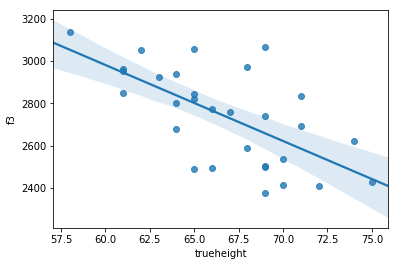

In [50]:
#model f3 regression plot
f0 = sns.regplot('trueheight','f3', data=df_means)
plt.show()

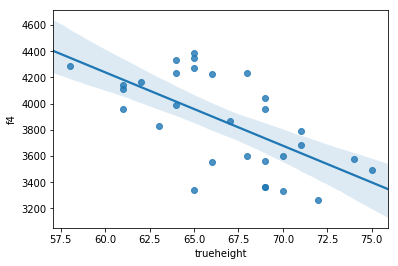

In [51]:
#model f4 regression plot
f0 = sns.regplot('trueheight','f4', data=df_means)
plt.show()

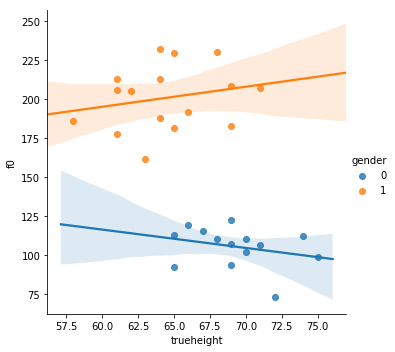

In [60]:
#make gendered plot for f0
gendered = sns.lmplot( x="trueheight", y="f0", data=df_means, hue='gender', legend=True)

In [61]:
#get vowel dependent means per speaker in new dataframe
df_means_vowels = df.groupby(['speaker', 'vowel'], as_index=False)['f0', 'f1', 'f2', 'f3', 'f4', 'trueheight', 'gender'].mean()
df_means_vowels.head()

,speaker,vowel,f0,f1,f2,f3,f4,trueheight,gender
0,11,a,217.339792,920.814000,1694.221143,2704.717143,4111.205714,69,1
1,11,v,200.395236,723.055915,1595.274225,2775.649296,3969.004507,69,1
2,12,a,181.303577,876.306230,1895.784754,3113.108852,4332.837213,58,1
3,12,v,190.865540,784.535692,1686.695538,3161.331077,4246.080462,58,1
4,13,a,228.015409,823.374833,1794.138167,2941.212500,4211.311667,68,1


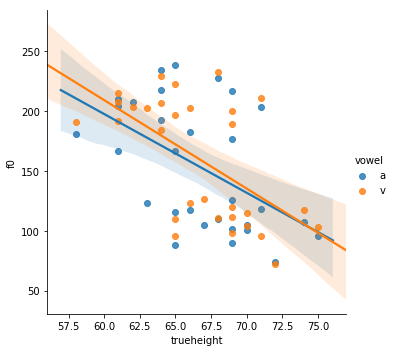

In [63]:
#make gendered plot for f0
gendered = sns.lmplot( x="trueheight", y="f0", data=df_means_vowels, hue='vowel', legend=True)

In [54]:
#get overall vowel dependent means independent of speaker in new dataframe
df_vowels = df.groupby(['vowel'], as_index=False)['f0', 'f1', 'f2', 'f3', 'f4', 'trueheight'].mean()
df_vowels.head()

,vowel,f0,f1,f2,f3,f4,trueheight
0,a,154.997005,797.539184,1713.623760,2721.724479,3882.398113,66.792954
1,v,161.213655,641.313438,1572.365864,2771.738181,3845.803493,66.748879


# Start modeling the data using simple linear regression and f0 as a predictor of height 

In [65]:
#build a simple regression model
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
X = df_means[['f0']]
Y = df_means['trueheight']

In [66]:
simple = lm.fit(X,Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.30547954260168864


In [67]:
#So this model explains around 30.54% of the variation, not very good. 

In [68]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [64.40167368 65.39262173 63.45991509 65.59013403]


In [71]:
# compare the predicted results with the actual results
mse = mean_squared_error(df_means['trueheight'], Yhat)
print('The mean square error of height and predicted value is: ', mse)

The mean square error of height and predicted value is:  11.165573886773519


In [73]:
lm.intercept_

73.56903313790562

In [75]:
lm.coef_

array([-0.04390342])

# Build multiple linear regression using f1, f2, f3, f4, and f0

In [76]:
#build multiple linear regression
Z = df_means[['f1', 'f2', 'f3', 'f4', 'f0']]

In [77]:
multiple = lm.fit(Z, Y)
# Find the R^2
print('The R-square is: ', lm.score(Z, df_means['trueheight']))

The R-square is:  0.4935513531314727


In [ ]:
#This model explains 49.94% of the variation. So better than the simple linear regression. 

In [78]:
Y_predict_multifit = lm.predict(Z)

In [79]:
print('The mean square error of height and predicted value using multifit is: ', \
      mean_squared_error(df_means['trueheight'], Y_predict_multifit))

The mean square error of height and predicted value using multifit is:  8.142006079489692


In [51]:
#mse is also smaller here, so a better model. 

In [80]:
lm.intercept_

105.0027210522901

In [81]:
lm.coef_

array([-0.00873965, -0.01081758, -0.00254355, -0.0029615 ,  0.02647335])

# Split data to predict height using f1, f2, f3, f4, f0

In [82]:
%%capture
! pip install ipywidgets

In [83]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [84]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Height')
    plt.ylabel('Proportion of Speakers')

    plt.show()
    plt.close()

In [85]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Height')
    plt.legend()

In [86]:
y_data = df_means['trueheight']

In [91]:
x_data=df_means.drop('trueheight',axis=1)

In [92]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 5
number of training samples: 25


In [93]:
#are we over of underfitting?
lr = LinearRegression()
lr.fit(x_train[['f1', 'f2', 'f3', 'f4', 'f0']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
#Prediction using training data:

yhat_train = lr.predict(x_train[['f1', 'f2', 'f3', 'f4', 'f0']])
yhat_train[0:5]

array([65.46838796, 67.43101032, 63.38821027, 70.97442218, 70.92520484])

In [95]:
#Prediction using test data:

yhat_test = lr.predict(x_test[['f1', 'f2', 'f3', 'f4', 'f0']])
yhat_test[0:5]

array([70.32020194, 71.1295114 , 63.90784938, 71.69073271, 61.65186601])

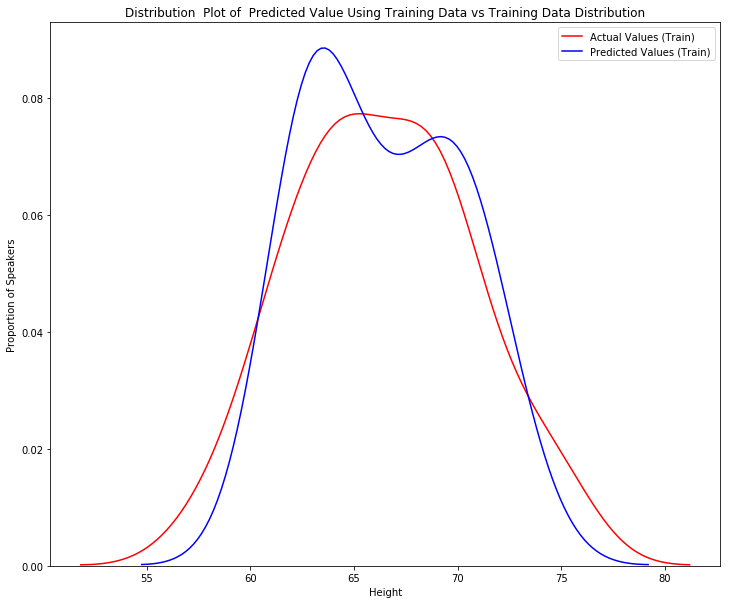

In [96]:
#examine the distribution of the predicted values of the training data.

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

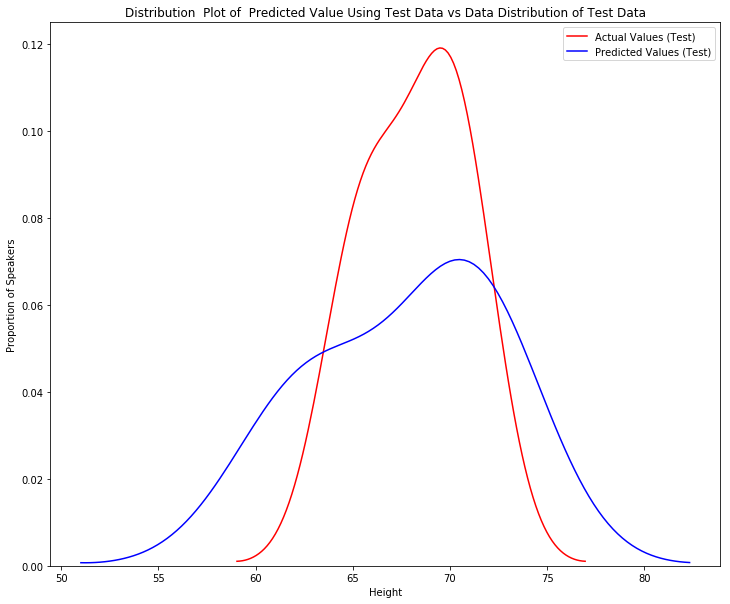

In [97]:
#what happens when the model encounters new data from the testing dataset? es.

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

# These plots look pretty bad for the test set, looks like our predictors aren't great at predicting height. (Keep in mind we have a small dataset)

# Classification

In [99]:
#import libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [98]:
df_means.shape

(30, 8)

In [137]:
#select features for prediction
Feature = binned[['f1','f2','f3','f4','f0', 'gender']]

In [138]:
X = Feature
X[0:5]

,f1,f2,f3,f4,f0,gender
0,821.233688,1644.396809,2740.434752,4039.600851,208.807427,1
1,828.964286,1787.921270,3137.985397,4288.081746,186.236335,1
2,756.256333,1749.312833,2973.965167,4231.598167,230.258117,1
3,878.618957,1731.535092,2842.795276,4268.894479,181.737544,1
4,875.218562,1655.819315,3051.036849,4169.153973,205.390580,1


In [139]:
#find qunique heights
unique = df_means.trueheight.unique()
print(sorted(unique))

[58, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75]


In [177]:
#bin heights 
bin = [0,58,65,70,75]
category = pd.cut(df_means.trueheight,bin, labels=['very short','short', 'medium', 'tall'])
category = category.to_frame()
category.columns = ['range']
binned = pd.concat([df_means,category],axis = 1)
binned.head()

,speaker,f0,f1,f2,f3,f4,trueheight,gender,range
0,11,208.807427,821.233688,1644.396809,2740.434752,4039.600851,69,1,medium
1,12,186.236335,828.964286,1787.921270,3137.985397,4288.081746,58,1,very short
2,13,230.258117,756.256333,1749.312833,2973.965167,4231.598167,68,1,medium
3,14,181.737544,878.618957,1731.535092,2842.795276,4268.894479,65,1,short
4,17,205.390580,875.218562,1655.819315,3051.036849,4169.153973,62,1,short


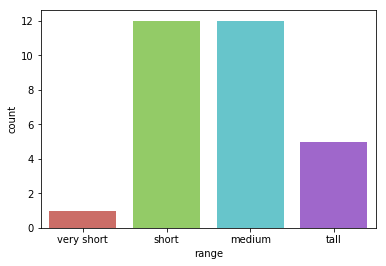

In [178]:
#plot height distribution in histogram
sns.countplot(x = 'range', data = binned, palette = 'hls')
plt.show()

In [184]:
y = binned['range']
y[0:5]

0        medium
1    very short
2        medium
3         short
4         short
Name: range, dtype: category
Categories (4, object): [very short < short < medium < tall]

In [188]:
y.describe()

count         30
unique         4
top       medium
freq          12
Name: range, dtype: object

# Classification

## Let's check different classification algorithms. 

### KNN

In [186]:
# KNN (k nearest neighbors)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =4)

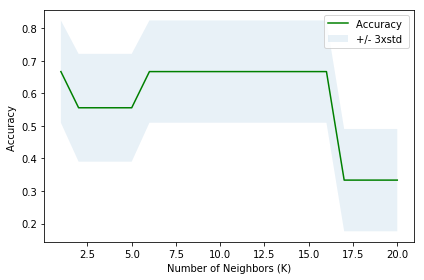

In [191]:
mean_acc=np.zeros(20)
std_acc = np.zeros(20)
for i in range(1,21):
    knnmodel=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    y_pred=knnmodel.predict(X_test)
    mean_acc[i-1]=metrics.accuracy_score(y_test,y_pred)
    std_acc[i-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
plt.plot(range(1,21),mean_acc,'g')
plt.fill_between(range(1,21),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [192]:
print( "Highest accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Highest accuracy 0.6666666666666666 with k= 1


### Decision tree

In [193]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

In [194]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [195]:
y_pred=dt.predict(X_test)
Accuracy=metrics.accuracy_score(y_test,y_pred)
Accuracy

0.3333333333333333

### Support vector machine

In [196]:
#SVM (support vector machine)
from sklearn import svm
svm=svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [197]:
y_pred=svm.predict(X_test)
y_pred

array(['short', 'short', 'short', 'short', 'short', 'short', 'short',
       'short', 'short'], dtype=object)

In [198]:
metrics.accuracy_score(y_test,y_pred)

0.3333333333333333

### Logistic Regression

In [199]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [200]:
y_pred=lr.predict(X_test)
print(y_pred)
print(lr.predict_proba(X_test))

['short' 'medium' 'tall' 'short' 'medium' 'tall' 'tall' 'tall' 'tall']
[[0.41172374 0.49971341 0.0689163  0.01964655]
 [0.3570911  0.2945353  0.30543809 0.04293551]
 [0.27970549 0.20665052 0.37519478 0.13844921]
 [0.43325852 0.50875942 0.04190403 0.01607802]
 [0.40569024 0.18693709 0.39860483 0.00876784]
 [0.33481832 0.23508078 0.39473528 0.03536562]
 [0.29818577 0.18493792 0.49235366 0.02452265]
 [0.2955146  0.17617079 0.52192549 0.00638912]
 [0.32403954 0.23337605 0.4151746  0.0274098 ]]


In [201]:
metrics.accuracy_score(y_test,y_pred)

0.5555555555555556

# Model Evaluation

In [202]:
#import libraries
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [203]:
#make variables 
yhat = lr.predict(X_test)
yhat
yhat_prob = lr.predict_proba(X_test)
yhat_prob

array([[0.41172374, 0.49971341, 0.0689163 , 0.01964655],
       [0.3570911 , 0.2945353 , 0.30543809, 0.04293551],
       [0.27970549, 0.20665052, 0.37519478, 0.13844921],
       [0.43325852, 0.50875942, 0.04190403, 0.01607802],
       [0.40569024, 0.18693709, 0.39860483, 0.00876784],
       [0.33481832, 0.23508078, 0.39473528, 0.03536562],
       [0.29818577, 0.18493792, 0.49235366, 0.02452265],
       [0.2955146 , 0.17617079, 0.52192549, 0.00638912],
       [0.32403954, 0.23337605, 0.4151746 , 0.0274098 ]])

In [204]:
#Check Jaccard score
jaccard_similarity_score(y_test, yhat)

0.5555555555555556

### jaccard is pretty bad (1.0 would indicate best classification accuracy)

In [207]:
f1_score(y_test, yhat, average='weighted') 

0.6211640211640213

In [208]:
#f1 is ok (1.0 would be the best score)

# After modeling, it seems that we can't predict height using acoustics. 